In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
slr_df = pd.read_csv('SLR and SLA (1993-2023).csv')

In [3]:
slr_df.head()

,time,latitude,longitude,adt,sla
0,1/1/1993,16.125,-51.125,0.5053,0.0271
1,1/1/1993,16.125,-50.875,0.4999,0.0254
2,1/1/1993,16.125,-50.625,0.4984,0.0274
3,1/1/1993,16.125,-50.375,0.4973,0.0290
4,1/1/1993,16.125,-50.125,0.4968,0.0306


In [20]:
slr_df[slr_df['longitude']<-51]

,time,latitude,longitude,adt,sla,size
0,1/1/1993,16.125,-51.125,0.5053,0.0271,1.0997
5,1/1/1993,16.375,-51.125,0.5095,0.0294,1.1020
10,1/1/1993,16.625,-51.125,0.5083,0.0260,1.0986
15,1/1/1993,16.875,-51.125,0.5049,0.0195,1.0921
20,1/1/1993,17.125,-51.125,0.5026,0.0140,1.0866
...,...,...,...,...,...,...
1048550,12/27/1996,27.625,-51.125,0.4550,-0.0556,1.0170
1048555,12/27/1996,27.875,-51.125,0.4358,-0.0741,0.9985
1048560,12/27/1996,28.125,-51.125,0.4126,-0.0963,0.9763
1048565,12/27/1996,28.375,-51.125,0.3872,-0.1200,0.9526


In [10]:
slr_df.describe()

,latitude,longitude,adt,sla,size
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.399717e+01,-5.062500e+01,2.789500e-01,4.778250e-03,1.077378e+00
std,1.039253e+01,3.535536e-01,3.692337e-01,1.286039e-01,1.286039e-01
min,1.612500e+01,-5.112500e+01,-6.319000e-01,-1.072600e+00,0.000000e+00
25%,2.487500e+01,-5.087500e+01,-1.555000e-01,-4.420000e-02,1.028400e+00
50%,3.387500e+01,-5.062500e+01,4.564000e-01,-1.000000e-03,1.071600e+00
75%,4.287500e+01,-5.037500e+01,5.298000e-01,4.820000e-02,1.120800e+00
max,5.187500e+01,-5.012500e+01,1.152500e+00,8.602000e-01,1.932800e+00


In [22]:
# import plotly.express as px

# color_scale = [(0, 'orange'), (1,'red')]
# slr_df['size'] = slr_df['sla']- min(slr_df['sla'])
# fig = px.scatter_mapbox(slr_df[slr_df['longitude']<-51], 
#                         lat="latitude", 
#                         lon="longitude", 
#                         hover_name="adt", 
#                         hover_data=["adt", "sla"],
#                         color="adt",
#                         color_continuous_scale=color_scale,
#                         size="size",
#                         zoom=8, 
#                         height=800,
#                         width=800)

# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [3]:
def take_percentage(df):
    df_state = df[df['County name'].isna()][df['State'].notna()][['State',2005,2015,2021]]
    df_county = df[df['County name'].notna()][['FIPS*','State','County name',2005,2015,2021]]
    for indx,row in df_county.iterrows():
        state = row['State']
        state_val = df_state[df_state['State']==state]
        for year in [2005,2015,2021]:
            percentage = 100*row[year]/state_val[year].values
            df_county.loc[indx,year] = percentage
    return df_county

In [3]:
living_res_df = pd.read_excel('living resources GDP.xlsx').dropna(how = 'all')
living_res_df = take_percentage(living_res_df)
living_res_df.head(8)

,FIPS*,State,County name,2005,2015,2021
1,48039.0,Texas,Brazoria,NaN,NaN,0.166312
2,48061.0,Texas,Cameron,34.245832,1.997005,0.503052
3,48167.0,Texas,Galveston,7.106647,6.195128,6.432148
4,48245.0,Texas,Jefferson,6.694250,0.477655,0.800477
5,48355.0,Texas,Nueces,0.123527,NaN,NaN
8,22051.0,Louisiana,Jefferson,2.806212,3.247689,4.948319
9,22057.0,Louisiana,Lafourche,0.397790,0.265379,0.731134
10,22071.0,Louisiana,Orleans,0.984637,0.959921,5.019468


In [4]:
marine_construct_df = pd.read_excel('marine construction.xlsx')
marine_construct_df = take_percentage(marine_construct_df.dropna(how = 'all'))
marine_construct_df.head(8)

,FIPS*,State,County name,2005,2015,2021
1,48039.0,Texas,Brazoria,NaN,NaN,3.597230
2,48061.0,Texas,Cameron,0.146669,NaN,0.687882
3,48167.0,Texas,Galveston,2.715626,2.396106,6.530378
4,48245.0,Texas,Jefferson,2.911301,2.658821,0.955824
5,48355.0,Texas,Nueces,3.447586,NaN,1.822213
8,22051.0,Louisiana,Jefferson,14.827425,6.336869,5.736590
9,22057.0,Louisiana,Lafourche,0.685557,NaN,4.170674
10,22071.0,Louisiana,Orleans,1.483294,NaN,2.804122


In [5]:
marine_transport_df = pd.read_excel('marine transportation.xlsx')
marine_transport_df = take_percentage(marine_transport_df.dropna(how = 'all'))
marine_transport_df.head(8)

,FIPS*,State,County name,2005,2015,2021
1,48039.0,Texas,Brazoria,0.373756,0.212425,0.359109
2,48061.0,Texas,Cameron,1.049036,0.831900,1.099809
3,48167.0,Texas,Galveston,1.488554,2.248632,3.168852
4,48245.0,Texas,Jefferson,0.973679,0.993644,1.124085
5,48355.0,Texas,Nueces,1.092424,1.015040,1.073260
8,22051.0,Louisiana,Jefferson,8.929144,9.191484,10.582328
9,22057.0,Louisiana,Lafourche,19.479433,27.215406,15.921112
10,22071.0,Louisiana,Orleans,10.224957,12.172731,7.524885


In [6]:
off_mineral_df = pd.read_excel('offshore mineral resources.xlsx')
off_mineral_df = take_percentage(off_mineral_df.dropna(how = 'all'))
off_mineral_df.head(8)

,FIPS*,State,County name,2005,2015,2021
1,48039.0,Texas,Brazoria,0.135401,0.016155,0.001160
2,48061.0,Texas,Cameron,NaN,0.004821,0.005234
3,48167.0,Texas,Galveston,0.178926,0.119532,0.412189
4,48245.0,Texas,Jefferson,0.374669,0.202406,0.049050
5,48355.0,Texas,Nueces,1.320996,1.461394,0.634237
8,22051.0,Louisiana,Jefferson,1.197953,1.917947,0.962518
9,22057.0,Louisiana,Lafourche,4.353033,2.064025,1.321229
10,22071.0,Louisiana,Orleans,51.528868,23.836701,26.009236


In [7]:
shipnBoat_df = pd.read_excel('ship and boat building.xlsx')
shipnBoat_df = take_percentage(shipnBoat_df.dropna(how = 'all'))
shipnBoat_df.head(8)

,FIPS*,State,County name,2005,2015,2021
1,48039.0,Texas,Brazoria,NaN,NaN,NaN
2,48061.0,Texas,Cameron,19.132301,NaN,NaN
3,48167.0,Texas,Galveston,3.481156,NaN,NaN
4,48245.0,Texas,Jefferson,20.627821,12.048528,10.497886
5,48355.0,Texas,Nueces,NaN,NaN,NaN
8,22051.0,Louisiana,Jefferson,56.615919,NaN,NaN
9,22057.0,Louisiana,Lafourche,NaN,NaN,NaN
10,22071.0,Louisiana,Orleans,1.209166,0.260594,0.596372


In [8]:
tot_ocean_eco = take_percentage(pd.read_excel('total ocean economy.xlsx').dropna(how = 'all'))
tot_ocean_eco.head(8)

,FIPS*,State,County name,2005,2015,2021
1,48039.0,Texas,Brazoria,0.566016,1.113203,2.104537
2,48061.0,Texas,Cameron,0.396048,0.616137,0.602201
3,48167.0,Texas,Galveston,0.763188,1.223101,1.219079
4,48245.0,Texas,Jefferson,0.687751,0.509335,0.394170
5,48355.0,Texas,Nueces,1.898980,2.249966,1.363646
8,22051.0,Louisiana,Jefferson,14.622720,10.532451,8.812682
9,22057.0,Louisiana,Lafourche,6.033726,9.603654,11.293948
10,22071.0,Louisiana,Orleans,42.548405,24.858637,26.402665


In [4]:
tourism_df = take_percentage(pd.read_excel('tourism and receration.xlsx').dropna(how = 'all'))
tourism_df.head(8)

,FIPS*,State,County name,2005,2015,2021
1,48039.0,Texas,Brazoria,1.581690,0.916605,1.074360
2,48061.0,Texas,Cameron,10.343973,10.403126,10.699476
3,48167.0,Texas,Galveston,23.854850,24.932156,24.767944
4,48245.0,Texas,Jefferson,3.301914,3.058323,3.262003
5,48355.0,Texas,Nueces,32.923114,31.833277,27.848269
8,22051.0,Louisiana,Jefferson,27.523850,26.759547,29.565573
9,22057.0,Louisiana,Lafourche,0.459091,0.869343,0.705755
10,22071.0,Louisiana,Orleans,59.719514,59.891353,53.838294


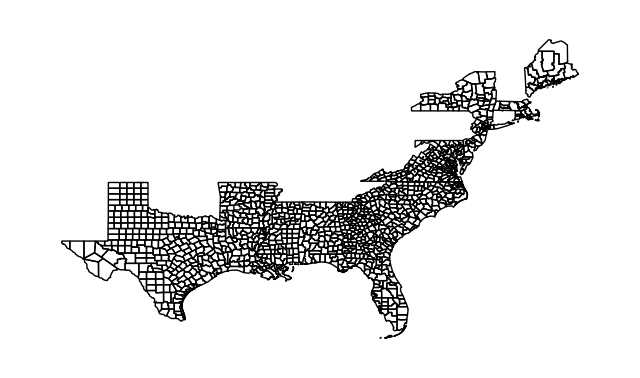

In [159]:
import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')



# Remove Alaska, Hawaii and Puerto Rico.
stateToKeep = ['01', '05', '10', '12', '13', '22', '23', '24', '25', '28', '34',
       '36', '37', '44', '45', '48', '51']
geoData = geoData[geoData.STATE.isin(stateToKeep)]


# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)
geoData = geoData[geoData['id']!=5051]

# Basic plot with just county outlines
gplt.polyplot(geoData);

In [165]:
tourism_df['FIPS*'] = tourism_df['FIPS*'].astype(int)
fullData = geoData.merge(tourism_df, left_on=['id'], right_on=['FIPS*'], how = 'left').drop(columns = ['FIPS*', 'State','County name']).fillna(-10)
fullData.head(2)

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,2005,2015,2021
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",-10.0,-10.0,-10.0
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",-10.0,-10.0,-10.0


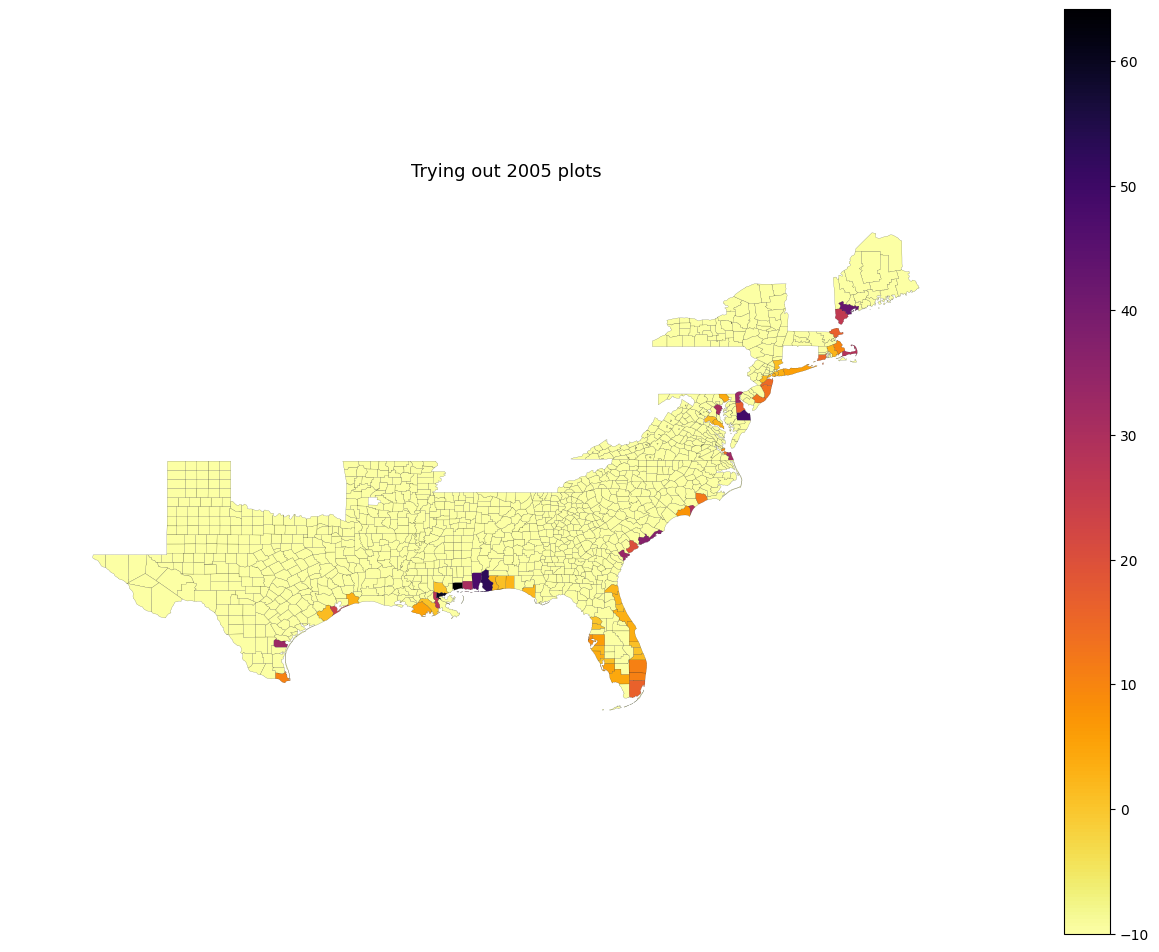

In [172]:
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(fullData[2005], k=10)

# Map
gplt.choropleth(fullData, 
    hue=fullData[2005].values, 
    linewidth=.1,
    cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
)

ax.set_title('Trying out 2005 plots', fontsize=13);
plt.show()

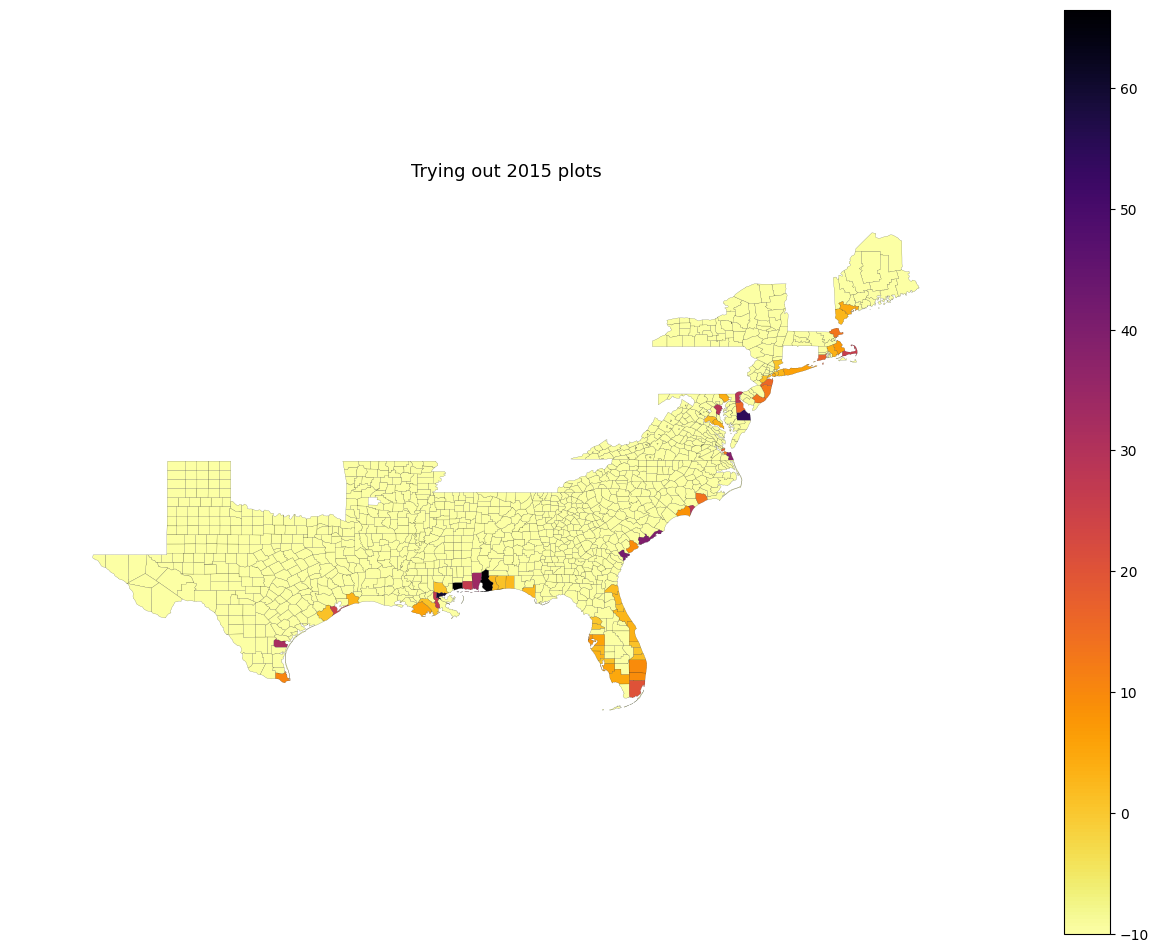

In [170]:
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(fullData[2005], k=10)

# Map
gplt.choropleth(fullData, 
    hue=fullData[2015].values, 
    linewidth=.1,
    cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
)

ax.set_title('Trying out 2015 plots', fontsize=13);
plt.show()

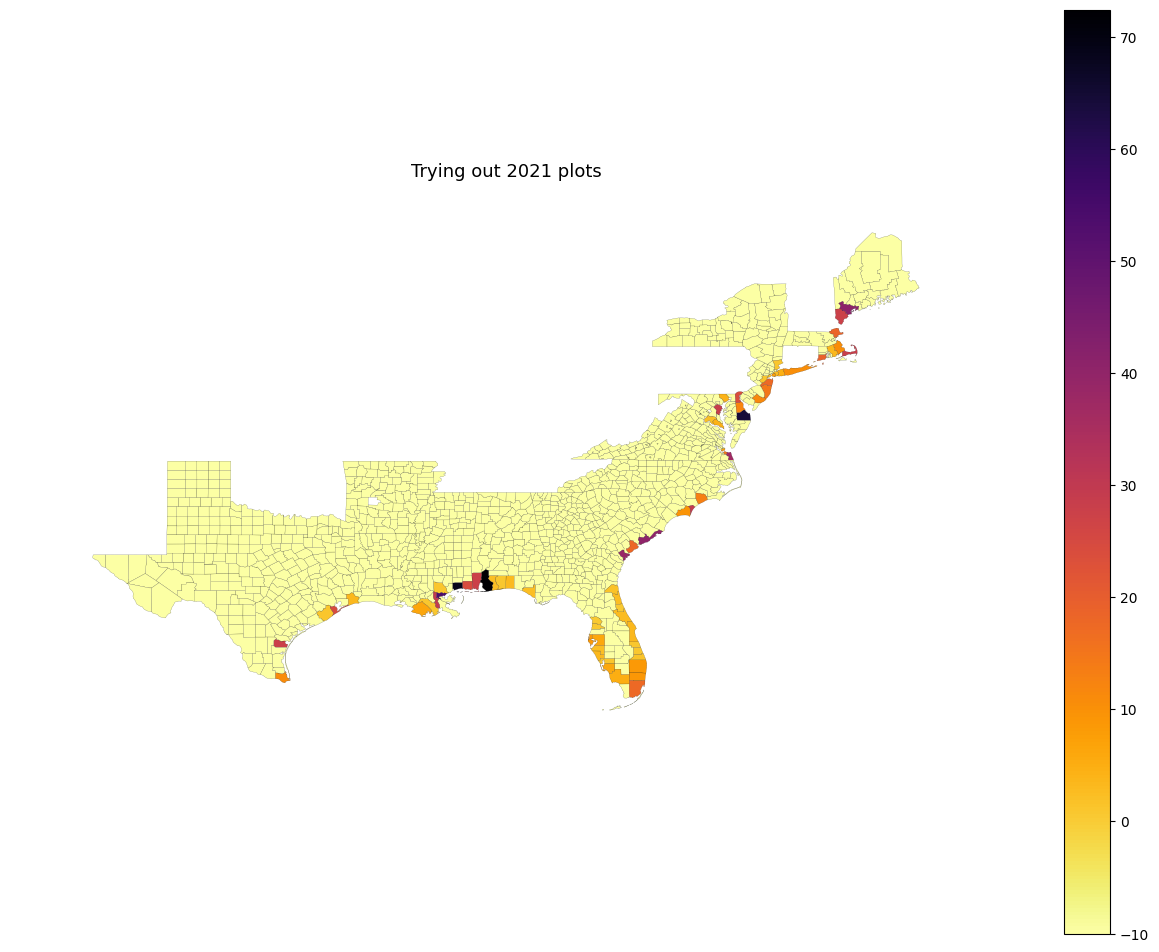

In [174]:
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(fullData[2005], k=10)

# Map
gplt.choropleth(fullData, 
    hue=fullData[2021].values, 
    linewidth=.1,
    cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
)

ax.set_title('Trying out 2021 plots', fontsize=13);
plt.show()